### This notebook explores the Number of updates on COVID-19 local situation (Singapore) on Ministry of Health's website since January. 

Data is first scraped off the website using BeautifulSoup and then Plotly is used to build an interactive visualization. Some static charts are also created using Seaborn. The data contains updates between 2 Jan 2020 and 25 March 2020.

In [1]:
from urllib.request import Request, urlopen
import requests
from bs4 import BeautifulSoup
import csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
import re

In [4]:
site = "https://www.moh.gov.sg/covid-19/past-updates"
hdr = {'User-Agent': 'Mozilla/5.0'}
bookpage = requests.get(site)
soup = BeautifulSoup(bookpage.text, "html.parser")
#print(soup.prettify())

In [5]:
soup.find_all('span')

[<span class="sgds-icon sgds-icon-sg-crest"></span>,
 <span>A Singapore Government Agency Website</span>,
 <span class="sr-only">Toggle navigation</span>,
 <span class="sgds-icon sgds-icon-menu"></span>,
 <span class="sgds-icon sgds-icon-search"></span>,
 <span class="caret"></span>,
 <span class="caret"></span>,
 <span class="caret"></span>,
 <span class="sgds-icon sgds-icon-search"></span>,
 <span class="sgds-icon sgds-icon-search"></span>,
 <span class="last">26 Mar 2020</span>,
 <span style="font-family: Arial; font-size: 16px;">Find past updates on the COVID-19 (Coronavirus Disease 2019) situation in Singapore below. <em>For the latest updates, please click </em><strong><a href="/covid-19" target="_blank"><em>here</em></a></strong>.</span>,
 <span style="font-size: 16px;"><strong><span style="font-family: Arial;"> Updates</span></strong></span>,
 <span style="font-family: Arial;"> Updates</span>,
 <span style="font-size: 16px; font-family: Arial;"><strong>Date</strong><br/></span>

In [6]:
len(soup.find_all('span'))

721

In [7]:
soup.find_all('span')[16]

<span style="font-family: Arial; font-size: 16px;">25 Mar 2020</span>

In [8]:
soup.find_all('span')[17]

<span style="font-family: Arial;"><span style="font-size: 16px;"><a class="" href="https://www.ica.gov.sg/careers/news-and-publications/media-releases/media-release/travellers-arriving-in-singapore-will-receive-advance-notification-of-stay-home-notice-requirements" target="_blank" title="">Travellers Arriving In Singapore Will Receive Advance Notification Of Stay-Home Notice Requirements</a> - Immigration &amp; Checkpoints Authority (ICA) </span></span>

In [9]:
soup.find_all('span')[18].get_text()

'Travellers Arriving In Singapore Will Receive Advance Notification Of Stay-Home Notice Requirements - Immigration & Checkpoints Authority (ICA)\xa0'

In [10]:
soup.find_all('span')[19].get_text()

'25 Mar 2020'

In [11]:
soup.find_all('span')[21].get_text()

'25 Mar 2020'

In [12]:
soup.find_all('span')[710]

<span style="font-family: Arial; font-size: 16px;"><a class="" href="https://www.moh.gov.sg/news-highlights/details/update-on-local-situation-regarding-severe-pneumonia-cluster-in-wuhan-5-jan" target="_blank" title="">Update on local situation regarding severe pneumonia cluster in Wuhan</a></span>

In [13]:
soup.find_all('span')[711]

<span style="font-family: Arial; font-size: 16px;">04 Jan 2020</span>

In [14]:
soup.find_all('span')[714]

<span style="font-family: Arial; font-size: 16px;"><a class="" href="https://www.moh.gov.sg/news-highlights/details/precautionary-measures-in-response-to-severe-pneumonia-cases-in-wuhan-china" target="_blank" title="">Precautionary Measures in Response to Severe Pneumonia Cases in Wuhan, China</a></span>

In [15]:
chunk = []
for i in range(0,715-16):
    c = soup.find_all('span')[i+16].get_text().replace(u'\xa0', u'')
    chunk.append((c))

In [16]:
chunk

['25 Mar 2020',
 'Travellers Arriving In Singapore Will Receive Advance Notification Of Stay-Home Notice Requirements - Immigration & Checkpoints Authority (ICA)',
 'Travellers Arriving In Singapore Will Receive Advance Notification Of Stay-Home Notice Requirements - Immigration & Checkpoints Authority (ICA)',
 '25 Mar 2020',
 'Five More Cases Discharged; 73 News Cases of COVID-19 Infection Confirmed',
 '25 Mar 2020',
 '[Updated] Health Advisory for Persons issued Stay-Home Notice (SHN)',
 '25 Mar 2020',
 '[Updated]Advisory for Individuals Sharing Residential Spaces with Persons issued Stay-Home Notice (SHN)(25 Mar 2020)',
 '[Updated]Advisory for Individuals Sharing Residential Spaces with Persons issued Stay-Home Notice (SHN)(25 Mar 2020)',
 '25 Mar 2020',
 'Measures to Prevent Congregations of Foreign Workers and Foreign Domestic Workers - Ministry of Manpower (MOM)',
 '25 Mar 2020',
 'Employers Advised To Plan For More Sustainable Housing Options For Their Workers Usually Housed In 

In [17]:
df = pd.DataFrame(np.array(chunk))

In [18]:
df.columns = ['text']

In [19]:
df

,text
0,25 Mar 2020
1,Travellers Arriving In Singapore Will Receive ...
2,Travellers Arriving In Singapore Will Receive ...
3,25 Mar 2020
4,Five More Cases Discharged; 73 News Cases of C...
5,25 Mar 2020
6,[Updated] Health Advisory for Persons issued S...
7,25 Mar 2020
8,[Updated]Advisory for Individuals Sharing Resi...
9,[Updated]Advisory for Individuals Sharing Resi...


In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [21]:
pd.DataFrame(df[df['text'].str.contains("2020")]['text'].value_counts())

,text
25 Mar 2020,16
20 Mar 2020,11
27 Jan 2020,10
31 Jan 2020,9
14 Feb 2020,8
15 Mar 2020,7
01 Feb 2020,7
16 Mar 2020,7
10 Mar 2020,7
04 Feb 2020,7


In [22]:
updates_count = pd.DataFrame(df[df['text'].str.contains("2020")]['text'].value_counts())

In [23]:
updates_count = updates_count.reset_index()

In [24]:
updates_count['text_len'] = updates_count['index'].apply(len)

In [25]:
updates_count.head()

,index,text,text_len
0,25 Mar 2020,16,11
1,20 Mar 2020,11,11
2,27 Jan 2020,10,11
3,31 Jan 2020,9,11
4,14 Feb 2020,8,11


In [26]:
updates_count = updates_count[updates_count['text_len']<=11]

In [27]:
updates_count

,index,text,text_len
0,25 Mar 2020,16,11
1,20 Mar 2020,11,11
2,27 Jan 2020,10,11
3,31 Jan 2020,9,11
4,14 Feb 2020,8,11
5,15 Mar 2020,7,11
6,01 Feb 2020,7,11
7,16 Mar 2020,7,11
8,10 Mar 2020,7,11
9,04 Feb 2020,7,11


In [28]:
updates_count['date'] = pd.to_datetime(updates_count['index'])

In [29]:
updates_count.head()

,index,text,text_len,date
0,25 Mar 2020,16,11,2020-03-25
1,20 Mar 2020,11,11,2020-03-20
2,27 Jan 2020,10,11,2020-01-27
3,31 Jan 2020,9,11,2020-01-31
4,14 Feb 2020,8,11,2020-02-14


In [30]:
updates_count.dtypes

index       object        
text        int64         
text_len    int64         
date        datetime64[ns]
dtype: object

In [31]:
date_list = pd.DataFrame({'date': pd.date_range(start='2020-01-02', end='2020-03-25', freq='D')})

In [32]:
date_list.dtypes

date    datetime64[ns]
dtype: object

In [33]:
updates_daily = pd.merge(date_list,updates_count,on='date',how='left')

In [34]:
updates_daily = updates_daily.fillna(0)

In [35]:
updates_daily.head()

,date,index,text,text_len
0,2020-01-02,02 Jan 2020,1.0,11.0
1,2020-01-03,0,0.0,0.0
2,2020-01-04,04 Jan 2020,1.0,11.0
3,2020-01-05,05 Jan 2020,1.0,11.0
4,2020-01-06,0,0.0,0.0


### Interactive chart 

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import plotly.graph_objects as go

In [42]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=updates_daily['date'],
    y=updates_daily['text'],
    hovertext=updates_daily[['date','text']].values,
    hoverinfo="x+y+text",
    marker=dict(
        color="green"
    ),
    showlegend=False
))

fig.update_layout(
    title="Number of updates on COVID-19 local situation on Ministry of Health's website"#,
    #xaxis_title="x Axis Title",
    #yaxis_title="y Axis Title",
    #font=dict(
    #    family="Courier New, monospace",
    #    size=18,
    #    color="#7f7f7f"
    )

fig.show()

### Static charts

C:\Users\chua1\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Number of news updates'), Text(0.5, 0, 'Date')]

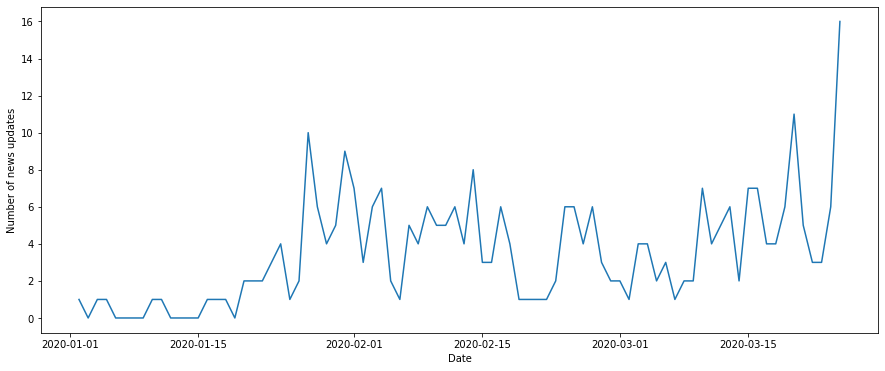

In [37]:
f, ax = plt.subplots(figsize = (15,6))
sns.lineplot(x='date', y='text', data=updates_daily)
ax.set(xlabel='Date', ylabel='Number of news updates')

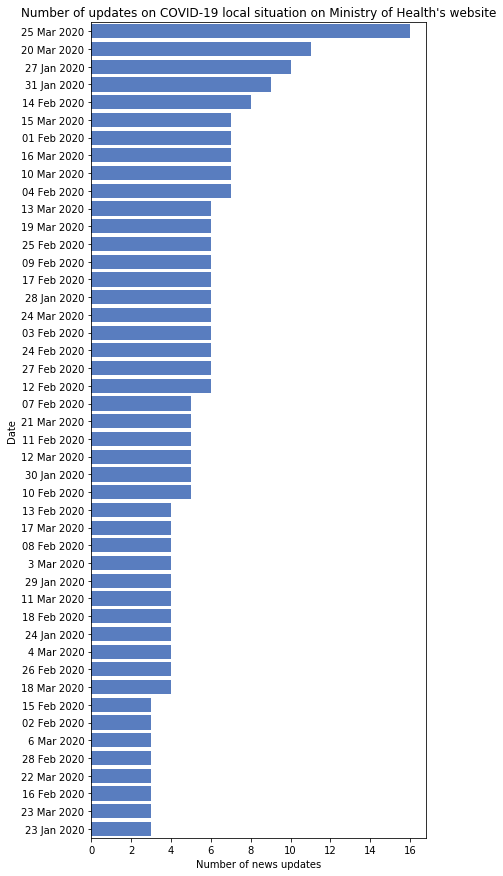

In [43]:
f, ax = plt.subplots(figsize = (6,15))
sns.set_color_codes('muted')
sns.barplot(x = 'text', y = 'index', data = updates_count[updates_count['text']>=3], color = 'b')
plt.title("Number of updates on COVID-19 local situation on Ministry of Health's website")
ax.set(ylabel='Date', xlabel='Number of news updates')
plt.show()